## Data analysis of 'temperatures.csv' dataset downloaded from the German weather service

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## Preprocessing

In [2]:
# Read the file 'temperatures.csv' and extract timestamps and temperatures
orig_data=pd.read_csv('temperatures.csv',
                      usecols= [2,3], 
                      parse_dates=[0],
                      index_col=0, 
                      squeeze=True)

In [3]:
# Convert the time steps of the temperature data to 15-minutes-intervals
data=(orig_data).resample('15T').asfreq()

In [4]:
# Interpolate the missing data
intrp_data = data.interpolate(method='spline', order = 5)
save_intrp_data = intrp_data.to_frame()
save_intrp_data.to_csv(r'D:\faunhofer\Intrp data.csv')

In [5]:
# Divide the dataset into separate dataframes corresponding for each year

df= intrp_data.reset_index()

df15=df[df['Zeitstempel'].dt.year == 2015] # dataset for 2015
df16=df[df['Zeitstempel'].dt.year == 2016] # dataset for 2016
df17=df[df['Zeitstempel'].dt.year == 2017] # dataset for 2017
df18=df[df['Zeitstempel'].dt.year == 2018] # dataset for 2018
df19=df[df['Zeitstempel'].dt.year == 2019] # dataset for 2019
df20=df[df['Zeitstempel'].dt.year == 2020] # dataset for 2020

In [6]:
# Set timestamps as indexes

df15 = df15.set_index('Zeitstempel')
df16 = df16.set_index('Zeitstempel')
df17 = df17.set_index('Zeitstempel')
df18 = df18.set_index('Zeitstempel')
df19 = df19.set_index('Zeitstempel')
df20 = df20.set_index('Zeitstempel')

## Finding hottest and coldest temperature values for each provided year

In [7]:
#Find hottest temperature values for every year and their time of occurrence. 
dfmax = {'Zeitstempel': 
              [df15.idxmax()[0],
               df16.idxmax()[0],
               df17.idxmax()[0],
               df18.idxmax()[0],
               df19.idxmax()[0],
               df20.idxmax()[0]], 
        'Wert':
              [df15.max()[0],
               df16.max()[0],
               df17.max()[0],
               df18.max()[0],
               df19.max()[0],
               df20.max()[0]]}
dfmax = pd.DataFrame(data=dfmax)

#Save hottest temperatures in a csv file in the 'Temperatures' folder
dfmax.to_csv(r'D:\Temperatures\Hottest temperatures.csv')

In [8]:
#Find coldest temperature values for every year and their time of occurrence.
dfmin = {'Zeitstempel': 
             [df15.idxmin()[0],
              df16.idxmin()[0],
              df17.idxmin()[0],
              df18.idxmin()[0],
              df19.idxmin()[0],
              df20.idxmin()[0]], 
        'Wert':
              [df15.min()[0],
               df16.min()[0],
               df17.min()[0],
               df18.min()[0],
               df19.min()[0],
               df20.min()[0]]}

dfmin = pd.DataFrame(data=dfmin)

#Save the coldest temperatures in a csv file in the 'Temperatures' folder
dfmin.to_csv(r'D:\Temperatures\Coldest temperatures.csv')

## Plotting

In [9]:
# Create new separate "date" and "time" columns for 'dfmin' and 'dmax'
dfmin['date'] = [d.date() for d in dfmin['Zeitstempel']]
dfmin['time'] = [d.time() for d in dfmin['Zeitstempel']]

dfmax['date'] = [d.date() for d in dfmax['Zeitstempel']]
dfmax['time'] = [d.time() for d in dfmax['Zeitstempel']]

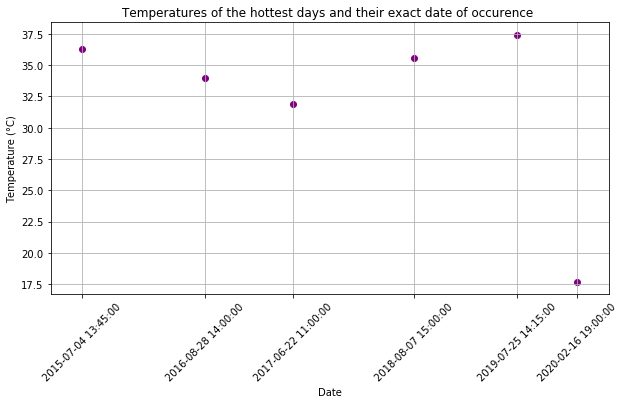

In [10]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 5))

# Create the scatter plot
dfmax=dfmax.set_index('Zeitstempel')
ax.scatter(dfmax.index.values,
        dfmax['Wert'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Temperature (°C)",
       title="Temperatures of the hottest days and their exact date of occurence ")

ax.set_xticks(dfmax.index)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M:%S"))
ax.grid(True)
_=plt.xticks(rotation=45) 
plt.show()

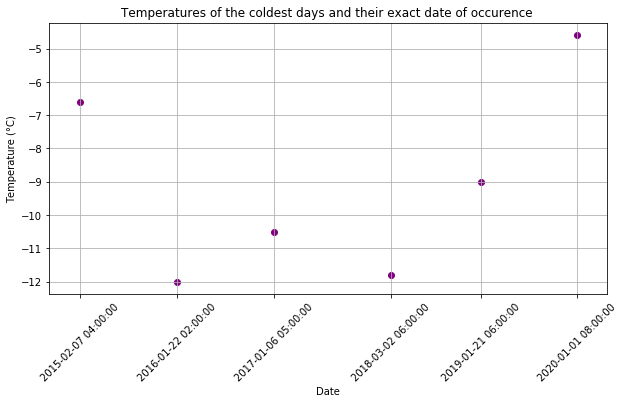

In [11]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 5))

# Creat the scatter plot
dfmin=dfmin.set_index('Zeitstempel')
ax.scatter(dfmin.index.values,
        dfmin['Wert'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Temperature (°C)",
       title="Temperatures of the coldest days and their exact date of occurence ")

ax.set_xticks(dfmin.index)
ax.grid(True)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M:%S"))
_=plt.xticks(rotation=45) 
plt.show()

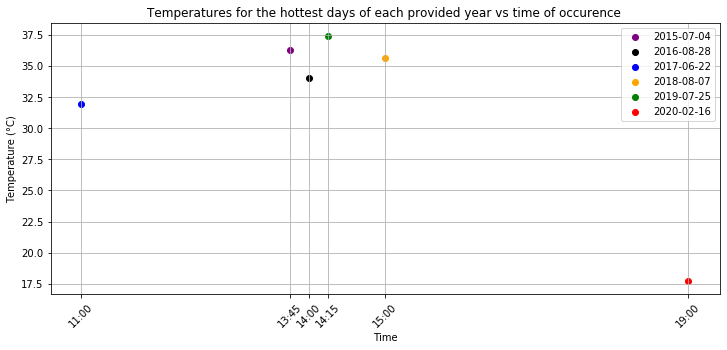

In [12]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 5))

# Set colors for the legends
colors = ['purple','black','blue','orange','green','red']

# Create the scatter plot
dfmax=dfmax.set_index('time')
i=0
for x, y, l, c in zip(dfmax.index.values, dfmax['Wert'], dfmax['date'],colors):
    ax.scatter(x, y, color=c, label=l)
    i=i+1
    
# Set title and labels for axes
ax.set(xlabel="Time",
       ylabel="Temperature (°C)",
       title="Temperatures for the hottest days of each provided year vs time of occurence ")

ax.legend()
ax.grid(True)
ax.set_xticks(dfmax.index)
_=plt.xticks(rotation=45) 

plt.show()

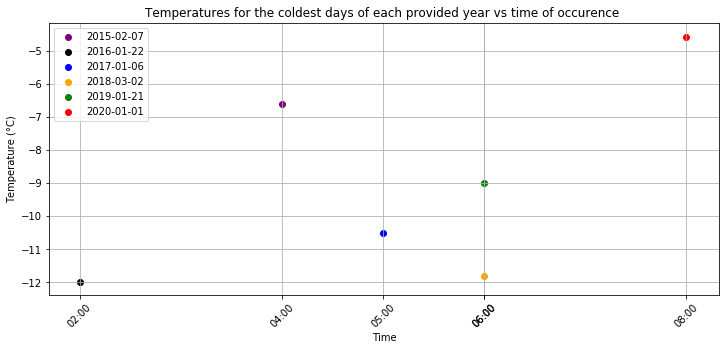

In [13]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 5))

# Create the scatter plot
dfmin=dfmin.set_index('time')
i=0
for x, y ,l, c in zip(dfmin.index.values, dfmin['Wert'], dfmin['date'],colors):
    ax.scatter(x, y, color=c, label=l)
    i=i+1
    
# Set title and labels for axes
ax.set(xlabel="Time",
       ylabel="Temperature (°C)",
       title="Temperatures for the coldest days of each provided year vs time of occurence ")

ax.legend()
ax.grid(True)
ax.set_xticks(dfmin.index)
_=plt.xticks(rotation=45) 
plt.show()

## Aditional analysis on the data: Density Plots of daily temperatures for years 2015-2020

In [14]:
# Downsample the previous data to get daily temperatures

d15 = df15.resample('D').asfreq()
d16 = df16.resample('D').asfreq()
d17 = df17.resample('D').asfreq()
d18 = df18.resample('D').asfreq()
d19 = df19.resample('D').asfreq()
d20 = df20.resample('D').asfreq()

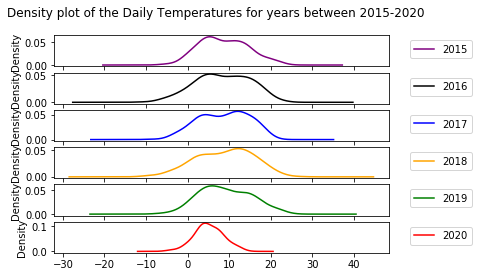

In [15]:
# Create figure and plot space
fig, axes = plt.subplots(nrows=6, sharex=True)

# Plot density plots for each year
d15.plot(kind='kde',ax=axes[0], color = colors[0])
d16.plot(kind='kde',ax=axes[1], color = colors[1])
d17.plot(kind='kde',ax=axes[2], color = colors[2])
d18.plot(kind='kde',ax=axes[3], color = colors[3])
d19.plot(kind='kde',ax=axes[4], color = colors[4])
d20.plot(kind='kde',ax=axes[5], color = colors[5])

# Create legends for the plots
legends = (["2015"], ["2016"],['2017'],["2018"], ["2019"],["2020"])

# Create the legend boxes outside of the plots
i=0
for x in legends:
    axes[i].legend(x,bbox_to_anchor = (1.05,1), loc = 2)
    i=i+1

# Set title    
plt.suptitle("Density plot of the Daily Temperatures for years between 2015-2020")
plt.show()